> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Once you complete this project, remove these **Tip** sections from your report before submission. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset - The Movie Database(TMDb)


## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> The Dataset contains information about 10,000 movies collected from the Movie Database (TMDb), inluding user ratings and revenue.
       - certain columns, likr 'cast' and 'genres', contain multiple values separated by pipe (|) characters.
       - There are some odd characters in the "cast' colum.
       - The final two columns ending with "_adj" show the budget and revenue of the associated movie in terms of 2010 dollars  accounting for inflation over time.

### Question(s) for Analysis
> which genres are most popular from year to year?
> What kinds of movie are asociated with movies that have high revenues?

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

In [2]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

Requirement already up-to-date: pandas==0.25.0 in /opt/conda/lib/python3.6/site-packages (0.25.0)


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you **document your data cleaning steps in mark-down cells precisely and justify your cleaning decisions.**


### General Properties
> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

In [9]:
df = pd.read_csv('tmdb-movies.csv')

In [11]:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [6]:
# this shows the number of rows and columns in the dataset
df.shape

(10866, 21)

In [5]:
# this performs statistical analysis on the numerical variables in the dataset
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

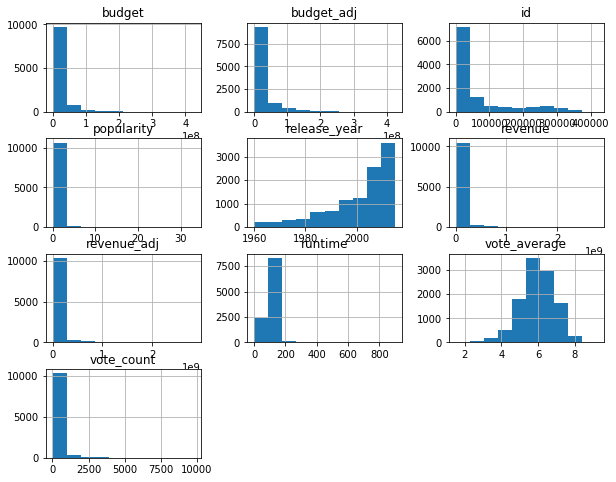

In [7]:
df.hist(figsize = (10, 8));

In [8]:
df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

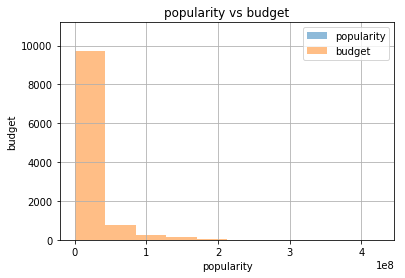

In [9]:
df["popularity"].hist(alpha = 0.5, label = "popularity")
df["budget"].hist(alpha = 0.5, label = "budget")
plt.legend()
plt.title("popularity vs budget")a
plt.xlabel("popularity")
plt.ylabel("budget");

In [11]:
data = df[["release_year", "genres"]]
data.head()

,release_year,genres
0,2015,Action|Adventure|Science Fiction|Thriller
1,2015,Action|Adventure|Science Fiction|Thriller
2,2015,Adventure|Science Fiction|Thriller
3,2015,Action|Adventure|Science Fiction|Fantasy
4,2015,Action|Crime|Thriller


### This chart shows the voting average for each year

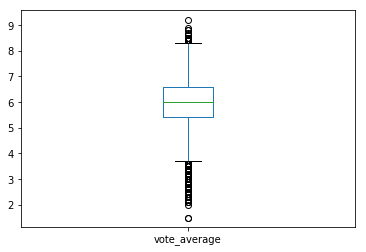

In [27]:
# this chart shows the voting average for each year
df.plot(x = "release_year", y = "vote_average", kind = "box")


### Data Cleaning
> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).
 

In [13]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. **Compute statistics** and **create visualizations** with the goal of addressing the research questions that you posed in the Introduction section. You should compute the relevant statistics throughout the analysis when an inference is made about the data. Note that at least two or more kinds of plots should be created as part of the exploration, and you must  compare and show trends in the varied visualizations. 



> **Tip**: - Investigate the stated question(s) from multiple angles. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables. You should explore at least three variables in relation to the primary question. This can be an exploratory relationship between three variables of interest, or looking at how two independent variables relate to a single dependent variable of interest. Lastly, you  should perform both single-variable (1d) and multiple-variable (2d) explorations.


### Research Question 1: which genre are most populated from year to year

release_year
1960    AxesSubplot(0.125,0.125;0.775x0.755)
1961    AxesSubplot(0.125,0.125;0.775x0.755)
1962    AxesSubplot(0.125,0.125;0.775x0.755)
1963    AxesSubplot(0.125,0.125;0.775x0.755)
1964    AxesSubplot(0.125,0.125;0.775x0.755)
1965    AxesSubplot(0.125,0.125;0.775x0.755)
1966    AxesSubplot(0.125,0.125;0.775x0.755)
1967    AxesSubplot(0.125,0.125;0.775x0.755)
1968    AxesSubplot(0.125,0.125;0.775x0.755)
1969    AxesSubplot(0.125,0.125;0.775x0.755)
1970    AxesSubplot(0.125,0.125;0.775x0.755)
1971    AxesSubplot(0.125,0.125;0.775x0.755)
1972    AxesSubplot(0.125,0.125;0.775x0.755)
1973    AxesSubplot(0.125,0.125;0.775x0.755)
1974    AxesSubplot(0.125,0.125;0.775x0.755)
1975    AxesSubplot(0.125,0.125;0.775x0.755)
1976    AxesSubplot(0.125,0.125;0.775x0.755)
1977    AxesSubplot(0.125,0.125;0.775x0.755)
1978    AxesSubplot(0.125,0.125;0.775x0.755)
1979    AxesSubplot(0.125,0.125;0.775x0.755)
1980    AxesSubplot(0.125,0.125;0.775x0.755)
1981    AxesSubplot(0.125,0.125;0.775x0.75

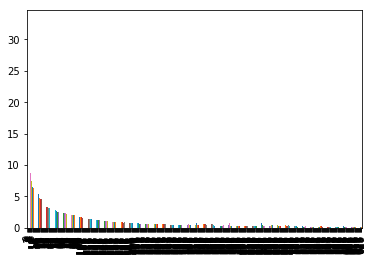

In [17]:
df.groupby('release_year').popularity.plot(kind='bar')


### Research Question 2: properties associated with movies wity high revenues.

revenue
0             AxesSubplot(0.125,0.125;0.775x0.755)
2             AxesSubplot(0.125,0.125;0.775x0.755)
3             AxesSubplot(0.125,0.125;0.775x0.755)
5             AxesSubplot(0.125,0.125;0.775x0.755)
6             AxesSubplot(0.125,0.125;0.775x0.755)
9             AxesSubplot(0.125,0.125;0.775x0.755)
10            AxesSubplot(0.125,0.125;0.775x0.755)
11            AxesSubplot(0.125,0.125;0.775x0.755)
12            AxesSubplot(0.125,0.125;0.775x0.755)
13            AxesSubplot(0.125,0.125;0.775x0.755)
15            AxesSubplot(0.125,0.125;0.775x0.755)
16            AxesSubplot(0.125,0.125;0.775x0.755)
20            AxesSubplot(0.125,0.125;0.775x0.755)
23            AxesSubplot(0.125,0.125;0.775x0.755)
27            AxesSubplot(0.125,0.125;0.775x0.755)
29            AxesSubplot(0.125,0.125;0.775x0.755)
30            AxesSubplot(0.125,0.125;0.775x0.755)
32            AxesSubplot(0.125,0.125;0.775x0.755)
42            AxesSubplot(0.125,0.125;0.775x0.755)
43            AxesSubpl

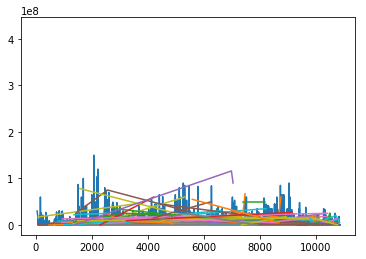

In [18]:
df.groupby('revenue').budget.plot(kind='line')


<a id='conclusions'></a>
## Conclusions

> the graph above showed the most popular genre from year to year and also the properties associated with movies

## Submitting your Project 

> **Tip**: Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> **Tip**: Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> **Tip**: Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [16]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0